# Tutorial - VAE pretraining with a traditional metric loss; triplet loss

## 1. Import requirements

In [1]:
import os
import sys
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt

In [2]:
sys.path = [os.path.abspath(os.path.join(os.getcwd(), os.pardir))] + sys.path

In [3]:
from MTMR.dataset import TrainingSmilesDataset, ValidationSmilesDataset
from vae_triplet import SmilesAutoencoder

## 2. Configure GPU (if available)

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if use_cuda else "cpu")
print(device)

cuda:0


## 3. Specify a target property

In [5]:
PROPERTY_NAME = "qed"

## 4. Set directories (for inputs and outputs)

In [6]:
input_dir = os.path.abspath(os.path.join(os.pardir, "DATA", PROPERTY_NAME))

In [7]:
output_dir = f"outputs_6-1_{PROPERTY_NAME.upper()}_pretraining_m20"
if not os.path.exists(output_dir):
    os.mkdir(output_dir)

## 5. Set file names

In [8]:
filepath_train = os.path.join(input_dir, "rdkit_train_triplet.txt")
filepath_valid = os.path.join(input_dir, "rdkit_valid.txt")

In [9]:
filepath_char2idx      = os.path.join(output_dir, "char2idx.csv")
filepath_configs       = os.path.join(output_dir, "configs.csv")
filepath_checkpoint    = os.path.join(output_dir, "checkpoints.pt")
filepath_history       = os.path.join(output_dir, "history.csv")
filepath_history_valid = os.path.join(output_dir, "history_valid.csv")

## 6. Load datasets (for training and validation)

In [10]:
dataset = TrainingSmilesDataset(filepath_train, device=device)
dataset.save_char2idx(filepath_char2idx)
dataset_valid = ValidationSmilesDataset(filepath_valid, filepath_char2idx, device=device)

## 7. Initialize a generator of MTMR

In [11]:
## Model configuration
model_configs = {"hidden_size":128,
                 "latent_size":128,
                 "num_layers" :2,
                 "vocab_size" :dataset.vocab_size,
                 "sos_idx"    :dataset.sos_idx,
                 "eos_idx"    :dataset.eos_idx,
                 "pad_idx"    :dataset.pad_idx,
                 "device"     :device
                }

## Model initialization
generator = SmilesAutoencoder(**model_configs)

## Configuration save
generator.save_config(filepath_configs)

## 8. Train

In [12]:
df_history, df_history_valid = generator.fit(dataset,
                                             validation_dataset=dataset_valid,
                                             margin=20.,
                                             checkpoint_filepath=filepath_checkpoint)

df_history.to_csv(filepath_history, index=False)
df_history_valid.to_csv(filepath_history_valid, index=False)

[00000000/00100000]  loss(tr): 201.686  loss_recon_src(tr): 3.381  loss_recon_tar(tr): 3.386  loss_recon_neg(tr): 3.379  loss_kld(tr): 2.013  loss_triplet(tr): 19.798  valid_ratio(va): 0.125  similarity(va): 0.003
[00001000/00100000]  loss(tr): 182.705  loss_recon_src(tr): 0.596  loss_recon_tar(tr): 0.524  loss_recon_neg(tr): 0.579  loss_kld(tr): 14.912  loss_triplet(tr): 16.751
[00002000/00100000]  loss(tr): 182.954  loss_recon_src(tr): 0.520  loss_recon_tar(tr): 0.460  loss_recon_neg(tr): 0.525  loss_kld(tr): 15.516  loss_triplet(tr): 16.719
[00003000/00100000]  loss(tr): 182.371  loss_recon_src(tr): 0.512  loss_recon_tar(tr): 0.457  loss_recon_neg(tr): 0.469  loss_kld(tr): 17.511  loss_triplet(tr): 16.462
[00004000/00100000]  loss(tr): 176.841  loss_recon_src(tr): 0.513  loss_recon_tar(tr): 0.436  loss_recon_neg(tr): 0.485  loss_kld(tr): 15.865  loss_triplet(tr): 16.074
[00005000/00100000]  loss(tr): 158.832  loss_recon_src(tr): 0.507  loss_recon_tar(tr): 0.425  loss_recon_neg(tr): 

[00048000/00100000]  loss(tr): 163.391  loss_recon_src(tr): 0.420  loss_recon_tar(tr): 0.313  loss_recon_neg(tr): 0.414  loss_kld(tr): 45.096  loss_triplet(tr): 11.810
[00049000/00100000]  loss(tr): 145.831  loss_recon_src(tr): 0.443  loss_recon_tar(tr): 0.321  loss_recon_neg(tr): 0.360  loss_kld(tr): 47.583  loss_triplet(tr): 9.806
[00050000/00100000]  loss(tr): 147.330  loss_recon_src(tr): 0.419  loss_recon_tar(tr): 0.295  loss_recon_neg(tr): 0.396  loss_kld(tr): 46.938  loss_triplet(tr): 10.021  valid_ratio(va): 1.000  similarity(va): 0.149
[00051000/00100000]  loss(tr): 148.378  loss_recon_src(tr): 0.430  loss_recon_tar(tr): 0.299  loss_recon_neg(tr): 0.360  loss_kld(tr): 46.959  loss_triplet(tr): 10.124
[00052000/00100000]  loss(tr): 151.844  loss_recon_src(tr): 0.419  loss_recon_tar(tr): 0.304  loss_recon_neg(tr): 0.370  loss_kld(tr): 41.749  loss_triplet(tr): 10.991
[00053000/00100000]  loss(tr): 147.244  loss_recon_src(tr): 0.428  loss_recon_tar(tr): 0.313  loss_recon_neg(tr): 

[00096000/00100000]  loss(tr): 160.775  loss_recon_src(tr): 0.440  loss_recon_tar(tr): 0.302  loss_recon_neg(tr): 0.351  loss_kld(tr): 44.734  loss_triplet(tr): 11.586
[00097000/00100000]  loss(tr): 156.762  loss_recon_src(tr): 0.428  loss_recon_tar(tr): 0.307  loss_recon_neg(tr): 0.349  loss_kld(tr): 49.446  loss_triplet(tr): 10.714
[00098000/00100000]  loss(tr): 154.959  loss_recon_src(tr): 0.406  loss_recon_tar(tr): 0.279  loss_recon_neg(tr): 0.328  loss_kld(tr): 49.000  loss_triplet(tr): 10.579
[00099000/00100000]  loss(tr): 142.520  loss_recon_src(tr): 0.414  loss_recon_tar(tr): 0.289  loss_recon_neg(tr): 0.355  loss_kld(tr): 49.851  loss_triplet(tr): 9.249
[00100000/00100000]  loss(tr): 152.915  loss_recon_src(tr): 0.428  loss_recon_tar(tr): 0.303  loss_recon_neg(tr): 0.335  loss_kld(tr): 49.562  loss_triplet(tr): 10.318  valid_ratio(va): 1.000  similarity(va): 0.149


## 9. Visualize for loss analysis

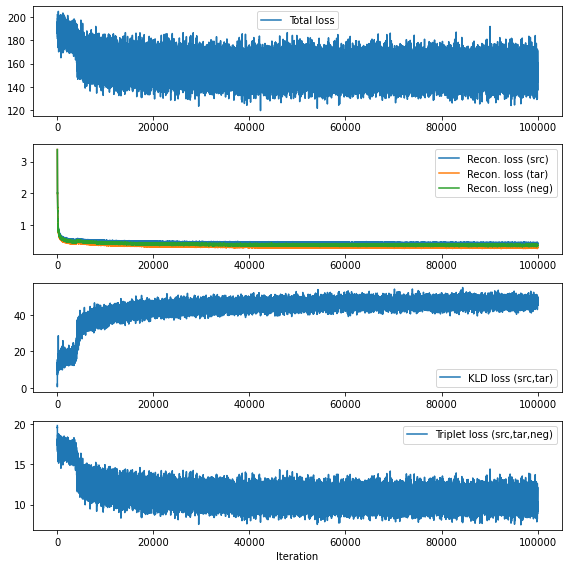

In [13]:
fig, axes = plt.subplots(4,1,figsize=(8,8))

axes[0].plot(df_history.loc[:,"LOSS_TOTAL"], label="Total loss")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_SOURCE"], label="Recon. loss (src)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_TARGET"], label="Recon. loss (tar)")
axes[1].plot(df_history.loc[:,"LOSS_RECONSTRUCTION_NEGATIVE"], label="Recon. loss (neg)")
axes[2].plot(df_history.loc[:,"LOSS_KL_DIVERGENCE"], label="KLD loss (src,tar)")
axes[3].plot(df_history.loc[:,"LOSS_TRIPLET"], label="Triplet loss (src,tar,neg)")

axes[3].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

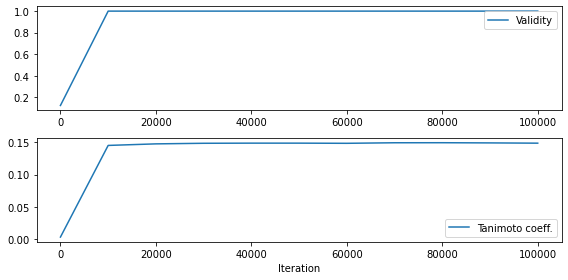

In [14]:
fig, axes = plt.subplots(2,1,figsize=(8,4))

axes[0].plot(df_history_valid.loc[:,"VALID_RATIO"], label="Validity")
axes[1].plot(df_history_valid.loc[:,"AVERAGE_SIMILARITY"], label="Tanimoto coeff.")

axes[1].set_xlabel("Iteration")
for ax in axes:
    ax.legend(loc='best')

plt.tight_layout()
plt.show()